<div style="color:white; background-color: #56a0d3; padding: 20px; border-radius:8px; font-size:26px"><b style="font-weight: 700;"><center>CAR PRICE PREDICTION (EDA) (12.01.2024)</center></b></div>

<div style="color:#56a0d3; border: 2px solid #56a0d3; padding: 10px;"><b style="font-weight: 700;"><center> The Data </center></b></div>

The Dataset is updated by a Kaggle user [(source here)](https://www.kaggle.com/datasets/thayakumarum/car-prediction-data)



| Column Name        | Details                                                     |
|--------------------|-------------------------------------------------------------|
| `ID`               | Unique identifier for each car entry.                       |
| `Price`            | Target variable representing the price of the car.          |
| `Levy`             | Tax or duty imposed on the car                              |
| `Manufacturer`     | Company that produced the car.                              |
| `Category`         | Classification of the car (e.g., sedan, SUV, etc.).         |
| `Leather interior` | Indicates if the car has a leather interior.                |
| `Fuel type`        | Type of fuel the car uses (e.g., petrol, diesel, hybrid).   |
| `Engine volume`    | Capacity of the car's engine.                               |
| `Mileage`          | Total distance the car has traveled.                        |
| `Cylinders`        | Number of cylinders in the car's engine.                    |
| `Gear box type`    | Type of transmission (e.g., automatic, manual).             |
| `Drive wheels`     | Configuration of wheels that receive power from the engine. |
| `Doors`            | Number of doors on the car.                                 |
| `Wheel`            | Type of wheel the car has (e.g., alloy, steel).             |
| `Color`            | Exterior color of the car.                                  |
| `Airbags`          | Number of airbags installed in the car for safety.          |

<div style="color:#56a0d3; border: 2px solid #56a0d3; padding: 10px;"><b style="font-weight: 700;"><center> Regression Problem </center></b></div>

<b style="font-weight: 700; font-size: 18px"> Predicting the cars price based on various features </b>

Within the framework of the type of problem, the following questions are of great interest:
- Which features are significant in predicting the price of a car.
- How well those variables describe the price of a car.

<div class="list-group" id="list-tab" role="tablist", style="font-weight: 700; font-size: 18px">

## TABLE OF CONTENTS

- <a href='#5'>5. PREPROCESSING</a>
    - <a href='#5-1'>5.1 Train-Test Split of Data</a>
    - <a href='#5-2'>5.2 Feature Scaling</a>
    - <a href='#5-3'>5.3 Feature Encoding</a>
- <a href='#6'>6. ASSUMPTIONS
    - <a href='#6-1'>6.1 Tranformations to solve skewness</a>
- <a href='#7'>7. FEATURE SELECTION
- <a href='#8'>8. BASELINE MODELS
</div>

In [1]:
import warnings

warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
from matplotlib import colors

# Customize the appearance of plots: (both the axes and the figure have a background color of #FFF9ED, which is a light beige color.)
sns.set(rc={"axes.facecolor":"#f5f7fa","figure.facecolor":"#f5f7fa"})                              # <-- `rc` stands for "runtime configuration" and allows you to set various properties of the plot.
                                                                                                   # <-- `"axes.facecolor"` sets the background color of the plot's axes.
                                                                                                   # <-- `"figure.facecolor"` sets the background color of the entire figure.

# These colors will be used in the plots created with seaborn:
palette = ['#56a0d3', '#8a8acb', '#ee70a6', '#c587b3', '#c1b0d5']


cmap = colors.ListedColormap(['#56a0d3', '#8a8acb', '#ee70a6', '#c587b3', '#c1b0d5'])              # <-- `cmap` is short for colormap, which is used for mapping data values to colors in a plot.
                                                                                                   #     This `cmap` could be used in a plot that requires a colormap (e.g., heatmap, scatter plot with color-coding).
                                                                                                   # <-- `colors.ListedColormap` is a function from the matplotlib library, which seaborn uses internally for plotting.

In [3]:
df = pd.read_pickle('df_clean')

In [4]:
cols_num = ['Levy', 'Engine_volume', 'Mileage_Km', 'Cylinders', 'Airbags', 'Price']

cols_cat = [col for col in df.columns if df[col].dtype == 'object']
cols_cat

['Manufacturer',
 'Category',
 'Leather_interior',
 'Fuel_type',
 'Gear_box_type',
 'Drive_wheels',
 'Doors',
 'Wheel',
 'Color']

<div style="background-color: rgba(86, 160, 211, 0.2); padding: 10px;"> <center>5. PREPROCESSING </center></div>

<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Train-Test Split

</div>

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

# SPLIT DATA
df_train, df_test = train_test_split(df,
                                     train_size=0.8,                            # <--- 80% train and 20% test
                                     test_size=0.2,
                                     random_state=100)

print(df_train.shape)
print(df_test.shape)

(12801, 15)
(3201, 15)


<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Feature Scaling

</div>

<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- Using **MinMaxScaler** for scaling the numerical features, since I dropped  the outliers and I didnt analysis the normality of the numerical variables.
</div>

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Train data
scaler = MinMaxScaler()

# Create dataframe with the fitted and transformed transformer from X_train
df_train[cols_num] = pd.DataFrame(scaler.fit_transform(df_train[cols_num]),
                                  columns = df_train[cols_num].columns,
                                  index = df_train[cols_num].index)


# --------------------------------------------------------------------------
# Test data

df_test[cols_num] = pd.DataFrame(scaler.transform(df_test[cols_num]),
                                 columns = df_test[cols_num].columns,
                                 index = df_test[cols_num].index)


In [7]:
display(df_train.head())

display(df_test.head())

,Price,Levy,Manufacturer,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_Km,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
7357,0.042968,0.399854,kia,Sedan,Yes,Petrol,0.485714,0.348217,0.2,Automatic,Front,4-Door,Left_wheel,Silver,0.750
11934,0.756112,0.721973,hyundai,Universal,Yes,Diesel,0.628571,0.398134,0.2,Automatic,Front,4-Door,Left_wheel,Black,0.250
6390,0.274516,0.410503,toyota,Sedan,No,Hybrid,0.628571,0.329537,0.2,Tiptronic,Front,4-Door,Left_wheel,Red,0.750
18014,0.001666,0.470630,hyundai,Sedan,No,Hybrid,0.600000,0.238389,0.2,Tiptronic,Front,4-Door,Left_wheel,White,0.625
5418,0.145506,0.283485,toyota,Sedan,No,Petrol,0.285714,0.528059,0.2,Automatic,Front,4-Door,Left_wheel,Pink,0.250


,Price,Levy,Manufacturer,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_Km,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
4903,0.859957,0.824952,ford,Coupe,No,Petrol,0.971429,0.415795,0.333333,Automatic,Rear,2-Door,Left_wheel,Red,0.500
12855,0.244753,0.372035,audi,Coupe,Yes,Petrol,0.431429,0.486896,0.200000,Manual,4x4,2-Door,Left_wheel,Silver,0.375
8043,0.410129,0.441576,mercedes-benz,Microbus,No,Diesel,0.545714,0.748325,0.200000,Manual,Rear,2-Door,Left_wheel,White,0.250
17684,0.013205,0.319990,toyota,Sedan,Yes,Petrol,0.428571,0.619939,0.200000,Automatic,Front,4-Door,Left_wheel,Black,0.750
11773,0.648280,0.591528,mercedes-benz,Sedan,Yes,Diesel,0.914286,0.554889,0.333333,Automatic,4x4,4-Door,Left_wheel,Black,0.750


<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Feature Encoding

</div>

In [8]:
from sklearn.preprocessing import OneHotEncoder

# Train data
encoder = OneHotEncoder(sparse = False,
                        handle_unknown='ignore')

# Fit and transform the categorical variables
df_temp = pd.DataFrame(encoder.fit_transform(df_train[cols_cat]),
                       columns = encoder.get_feature_names_out(cols_cat),
                       index = df_train.index)

# Add the encoded variables to the dataframe
df_train = pd.concat([df_temp, df_train[cols_num]], axis = 1)
# --------------------------------------------------------------------------
# Test data

# Fit and transform the categorical variables
df_temp = pd.DataFrame(encoder.transform(df_test[cols_cat]),
                       columns = encoder.get_feature_names_out(cols_cat),
                       index = df_test.index)

# Add the encoded variables to the dataframe
df_test = pd.concat([df_temp, df_test[cols_num]], axis = 1)

In [9]:
display(df_train.head())

display(df_test.head())

,Manufacturer_acura,Manufacturer_alfa romeo,Manufacturer_audi,Manufacturer_bmw,Manufacturer_buick,Manufacturer_cadillac,Manufacturer_chevrolet,Manufacturer_chrysler,Manufacturer_citroen,Manufacturer_daewoo,...,Color_Silver,Color_Sky_blue,Color_White,Color_Yellow,Levy,Engine_volume,Mileage_Km,Cylinders,Airbags,Price
7357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.399854,0.485714,0.348217,0.2,0.750,0.042968
11934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.721973,0.628571,0.398134,0.2,0.250,0.756112
6390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.410503,0.628571,0.329537,0.2,0.750,0.274516
18014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.470630,0.600000,0.238389,0.2,0.625,0.001666
5418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.283485,0.285714,0.528059,0.2,0.250,0.145506


,Manufacturer_acura,Manufacturer_alfa romeo,Manufacturer_audi,Manufacturer_bmw,Manufacturer_buick,Manufacturer_cadillac,Manufacturer_chevrolet,Manufacturer_chrysler,Manufacturer_citroen,Manufacturer_daewoo,...,Color_Silver,Color_Sky_blue,Color_White,Color_Yellow,Levy,Engine_volume,Mileage_Km,Cylinders,Airbags,Price
4903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.824952,0.971429,0.415795,0.333333,0.500,0.859957
12855,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.372035,0.431429,0.486896,0.200000,0.375,0.244753
8043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.441576,0.545714,0.748325,0.200000,0.250,0.410129
17684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.319990,0.428571,0.619939,0.200000,0.750,0.013205
11773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.591528,0.914286,0.554889,0.333333,0.750,0.648280


<div style="background-color: rgba(86, 160, 211, 0.2); padding: 10px;"> <center>6. ASSUMPTIONS </center></div>

### What are the assumptions underlying the statistical bases for multivariate analysis?

To answer the previous questions is translate into understanding how **Price** complies with the **statistical assumptions** that enables me to apply **multivariate techniques**.

According to [Hair et al. (2018)](https://www.amazon.de/Multivariate-Analysis-Drexel-University-Anderson/dp/1473756545/ref=sr_1_1?__mk_de_DE=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=3EO38QN4DIZAC&keywords=Multivariate+Data+Analysis&qid=1705933518&sprefix=multivariate+data+analysis%2Caps%2C101&sr=8-1), four assumptions should be tested:
1. **NORMALITY**: The data should look like a normal distribution. This is important because several statistic tests rely on the normality of the data. Two types of normality to be checked:
- Univariate normality:
- Multivariate normality: Some methods to check for this assumption are:
    - Method 1. **Multivariate Normal Q-Q Plot**:
        - A Q-Q (quantile-quantile) plot specifically designed for assessing multivariate normality. It compares the observed quantiles of the sample data against the quantiles of a multivariate normal distribution.
        - In a Multivariate Normality condition the points on the plot should approximately fall along a straight line.
        - Deviations from a straight line may indicate departures from multivariate normality.
    - Method 2. **Mahalanobis Distance Plot**:
        - A plot of Mahalanobis distances, which measures the distance of each observation from the centroid of the multivariate distribution.
        - In a Multivariate Normal distribution, Mahalanobis distances should follow a chi-squared distribution.
        - Plot the Mahalanobis distances and compare against a chi-squared distribution with appropriate degrees of freedom.
    - Method 3. **Anderson-Darling Test**:
        - A statistical test that evaluates whether a sample comes from a particular distribution, including multivariate normal.
        - The Anderson-Darling test statistic should not be significantly different from the critical values for multivariate normality.
        - A p-value less than the significance level may indicate departure from multivariate normality.

Another aspect to consider is that in big samples (> 200 observations) normality is not such an issue.
if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity).

2. **HOMOSCEDASTICITY**: Also known as homogeneity of variance, is an assumption in multivariate regression analysis that deals with the variability of errors (residuals) across all levels of the independent variables. In simpler terms, it suggests that the spread or dispersion of residuals should be roughly constant across the range of predicted values. Violating this assumption can lead to inefficient estimates of regression coefficients and can affect the validity of statistical inferences.
The most common way to check for homoscedasticity in multivariate regression analysis is through the examination of *residual plots*.
- Method 1. **Residual vs. Fitted Values Plot**:
    - Create a scatterplot where the residuals (the differences between the observed and predicted values) are plotted against the predicted values.
    - In a homoscedastic scenario, you would expect the spread of residuals to be relatively constant across all levels of the predicted values.
    -  A horizontal band or cloud of points with no discernible pattern indicates homoscedasticity. On the other hand, patterns like a funnel shape or an expanding/collapsing cloud may suggest heteroscedasticity.
- Method 2. **Scale-Location (or Spread-Location) Plot**:
    - Similar to the residuals vs. fitted values plot, but the square root of the absolute residuals is plotted against the fitted values.
    - In a homoscedastic scenario, a constant spread of points across all levels of predicted values.
    - A horizontal band or cloud of points with consistent spread suggests homoscedasticity.
3. **LINEARITY**: The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations.
4. **ABSENCE OF CORRELATED ERRORS**: Checking for the absence of correlated errors (or independence of residuals) in multivariate regression analysis is crucial for the validity of the model. Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. *This occurs often in time series, where some patterns are time related*. if autocorrelation is present, it may suggest that the model is not capturing some temporal or spatial patterns in the data. Adjustments to the model or additional variables may be necessary. Some common ways to assess the independence of residuals:
    - Method 1. **Residual Autocorrelation Plot**:
        - To plot the autocorrelation of residuals against lag values.
        - In the absence of autocorrelation, residuals should not exhibit any systematic pattern in the plot.
        - I should look for any significant spikes or patterns in the autocorrelation plot.
    - Method 2. **Durbin-Watson Test**:
        - A statistical test for detecting autocorrelation in the residuals.
        - The Durbin-Watson statistic should be close to 2. A value significantly different from 2 may indicate autocorrelation.
        - A Durbin-Watson statistic close to 2 suggests independence, while values significantly different from 2 suggest autocorrelation.
    - Method 3. **Ljung-Box Test**:
        - A statistical test for the null hypothesis that residuals have no autocorrelation.
        - The p-value should be greater than the significance level for each lag.
        - A significant p-value may indicate autocorrelation.

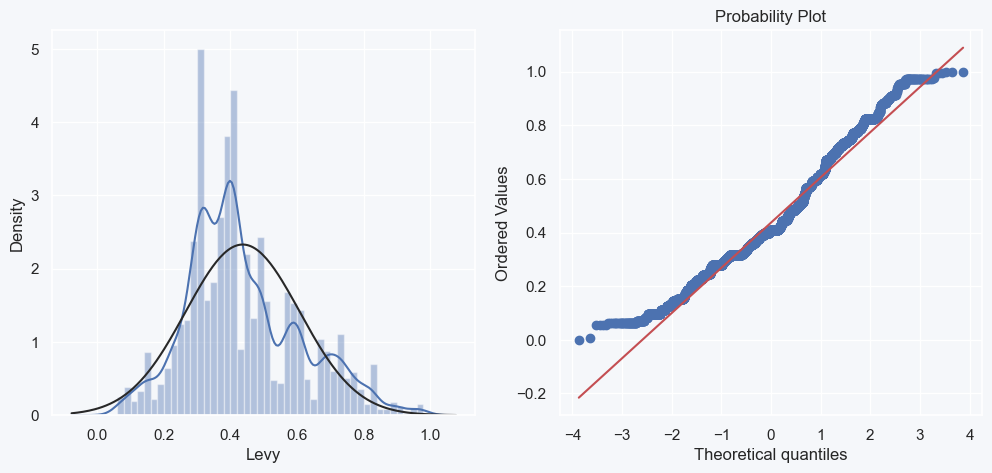

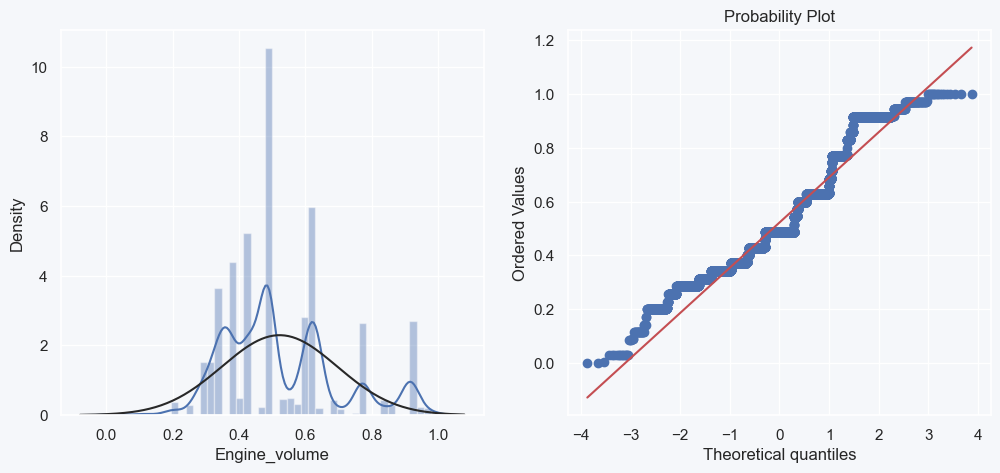

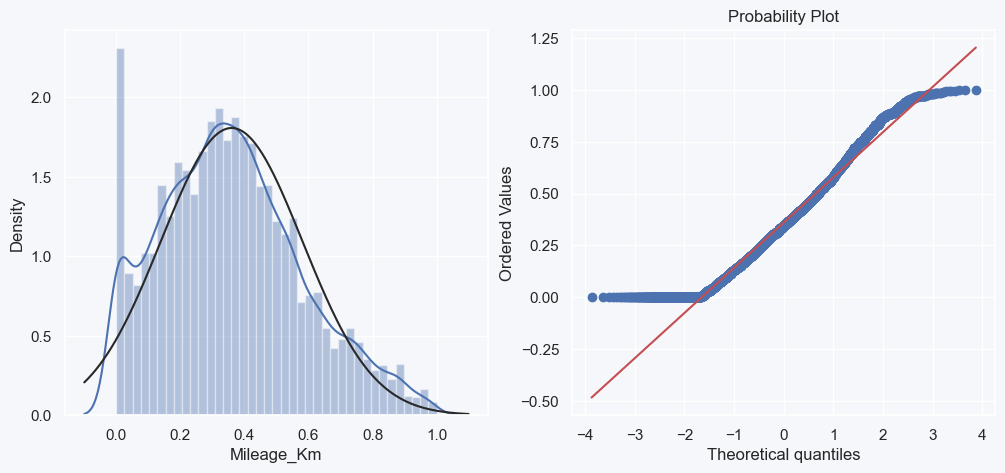

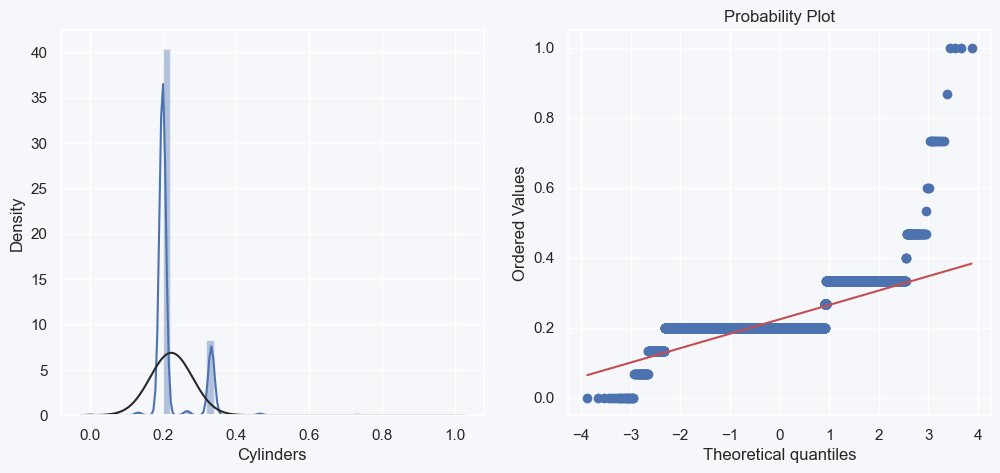

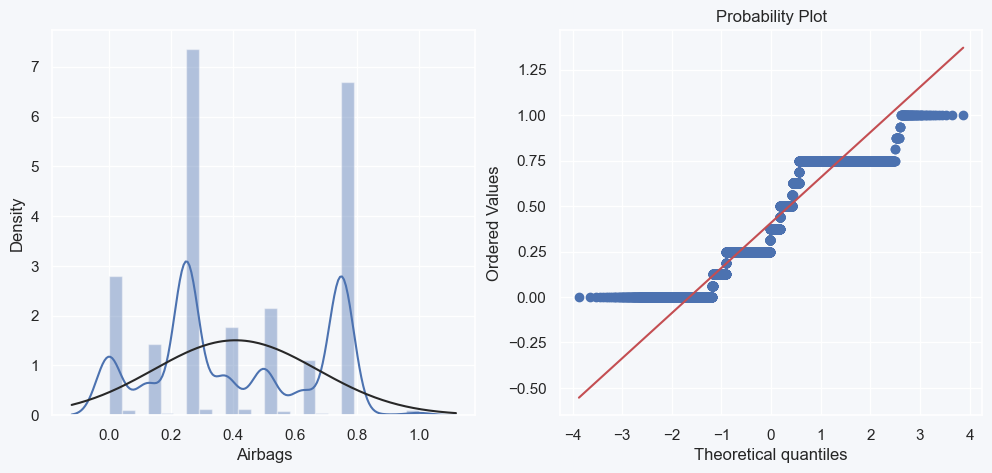

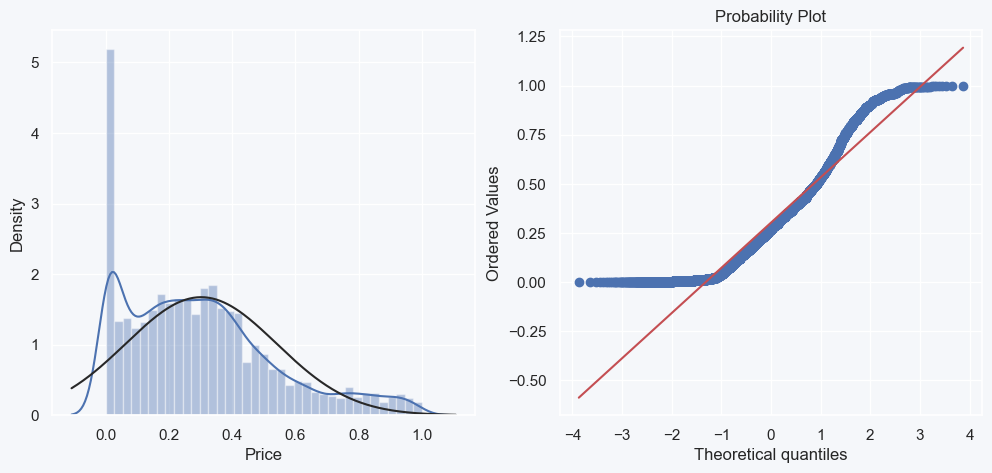

In [10]:
# Univariate Normality

from scipy.stats import norm
from scipy import stats

def univ_norm(df, x):

    fig = plt.figure(figsize = (12,5))

    # distribution plot
    fig1 = fig.add_subplot(121)

    sns.distplot(df[x],
                 fit=norm);

    # QQ-plot
    fig2 = fig.add_subplot(122)

    res = stats.probplot(df_train[x],
                         plot=plt)

# --------------------------

for col in cols_num:

    univ_norm(df_train,col)


<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

**Levi**
- There are some values (close to 0) that maybe need to be removed (?)
- The data doesnt look so skewed

</div>

<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

**Price**
- Price is *not Normally distributed*. It is *positively skewed* and does *not follow the diagonal line*.
- There is a significant number of observations with zero values (cars given by free)

<font color='#00a98f'> I will apply **Log-Transformation** (suitable for positive (right) skewed data), but with two possible variants to avoid dealing with zeros</font>
<font color='#00a98f'> I will apply **Hyperbolic sine transformation** (suitable for data with zero values by adding a small constant to the data before transformation) helping to avoid issues with zero values in ther logarithmic component of the transformation </font>

I will keep the one with the best results.
</div>

**Method 1: Square Root Transformation**

In [11]:
# # Method 1: Square Root Transformation
# # Log-transform the Price data
# df_train['Price'] = np.sqrt(df_train['Price'])
# print(df_train['Price'].skew())
# # show transformed histogram and normal probability plot
# univ_norm(df_train,'Price')

**Method 2: Apply Log-Transformation replacing the zeros with nan values. Afterward, the nan values are back replaced by the zero values.**

In [12]:
# # Method 2: Apply Log-Transformation replacing the zeros with nan values. Afterward, the nan values are back replaced by the zero values.
#
# print('number of zeros in the column ->', df_train[df_train['Price']==0]['Price'].count())
#
# # Replace the zeros by nan values
# df_train['Price'] = df_train['Price'].replace(0, np.nan)
#
# print('number of zeros in the column ->', df_train[df_train['Price']==0]['Price'].count())
# print('number of nans in the column ->', df_train['Price'].isna().sum())
#
# # Apply log-transformation
# df_train['Price'] = np.log(df_train['Price'])
#
# print(df_train['Price'].skew())
#
# # Replace the nan values back to zeros
# df_train['Price'] = df_train['Price'].replace(np.nan, 0)
#
# print(df_train['Price'].skew())
#
# # Show transformed histogram and normal probability plot
# univ_norm(df_train,'Price')

**Method 3: Apply hyperbolic sine transformation (also known as the arcsinh transformation)**

In [13]:
# # Method 3: Apply hyperbolic sine transformation (also known as the arcsinh transformation)
#
# df_train['Price'] = np.arcsinh(df_train['Price'] + 1e-5)
#
# # Show transformed histogram and normal probability plot
# univ_norm(df_train,'Price')

<div style="background-color: rgba(86, 160, 211, 0.2); padding: 10px;"> <center>7. FEATURE SELECTION </center></div>

In [14]:
df_train_corr = df_train.copy()

In [15]:
y_train = df_train.pop('Price')      # Remove the column 'Price' from df_train and add it to y_train
X_train = df_train.copy()

y_test = df_test.pop('Price')
X_test = df_test.copy()

**Feature importance from ExtraTreeRegressor**

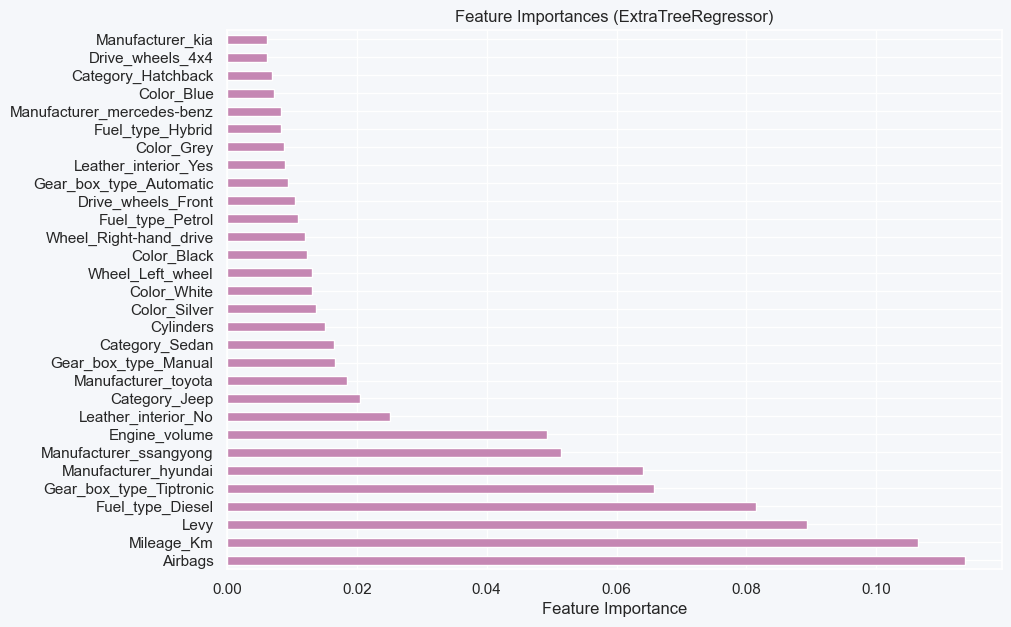

In [16]:
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor

# Fit ExtraTreeRegressor
model_ETR = ExtraTreeRegressor()
model_ETR.fit(X_train,y_train)

# Get feature importances
imp_fet=pd.Series(model_ETR.feature_importances_,
                  index = X_train.columns)

# Sort feature importances in descending order
imp_fet_sorted = imp_fet.sort_values(ascending=False)

# Plot the sorted feature importances
plt.figure(figsize=(10, 7))
top_feats_ETR = imp_fet_sorted.nlargest(30)
top_feats_ETR.plot(kind='barh',
                   color = '#c587b3')

# list with the top features selected
top_feats_ETR = top_feats_ETR.index.tolist()

plt.xlabel('Feature Importance')
plt.title('Feature Importances (ExtraTreeRegressor)')
plt.show()

**Feature importance from XGBRegressor**
- Questions and answers to differences in plot_importance and model_XGB.feature_importances_ [Here](https://stackoverflow.com/questions/58984474/how-to-get-correct-feature-importance-plot-in-xgboost), [Here](https://datascience.stackexchange.com/questions/34209/xgboost-quantifying-feature-importances/41548#41548) and [Here](https://datascience.stackexchange.com/questions/12318/how-to-interpret-the-output-of-xgboost-importance)
- Interesting online book about Machine Learning: [(Christoph Molnar)](https://christophm.github.io/interpretable-ml-book/)

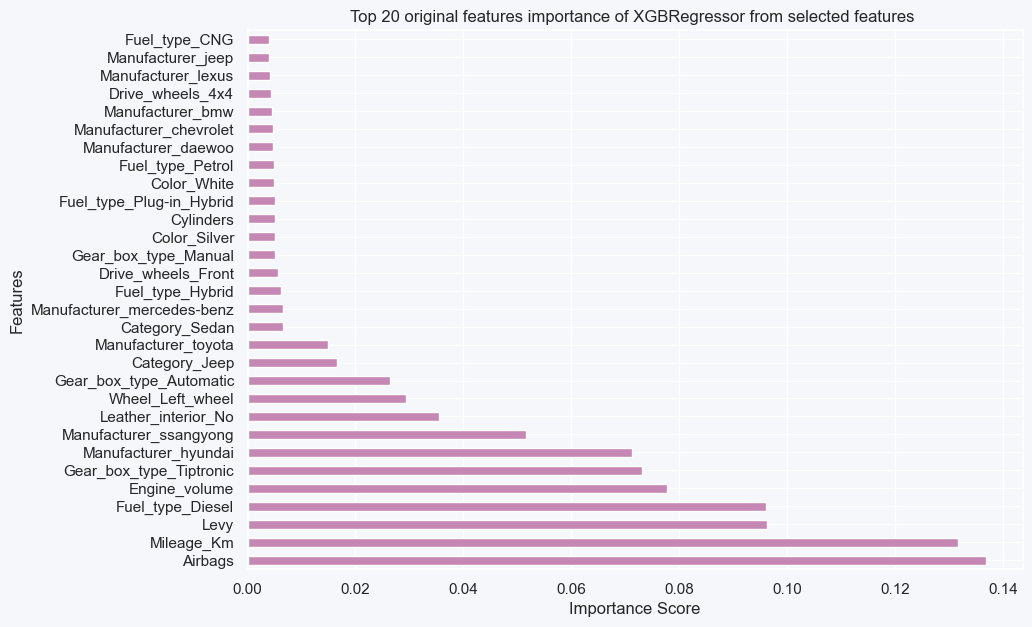

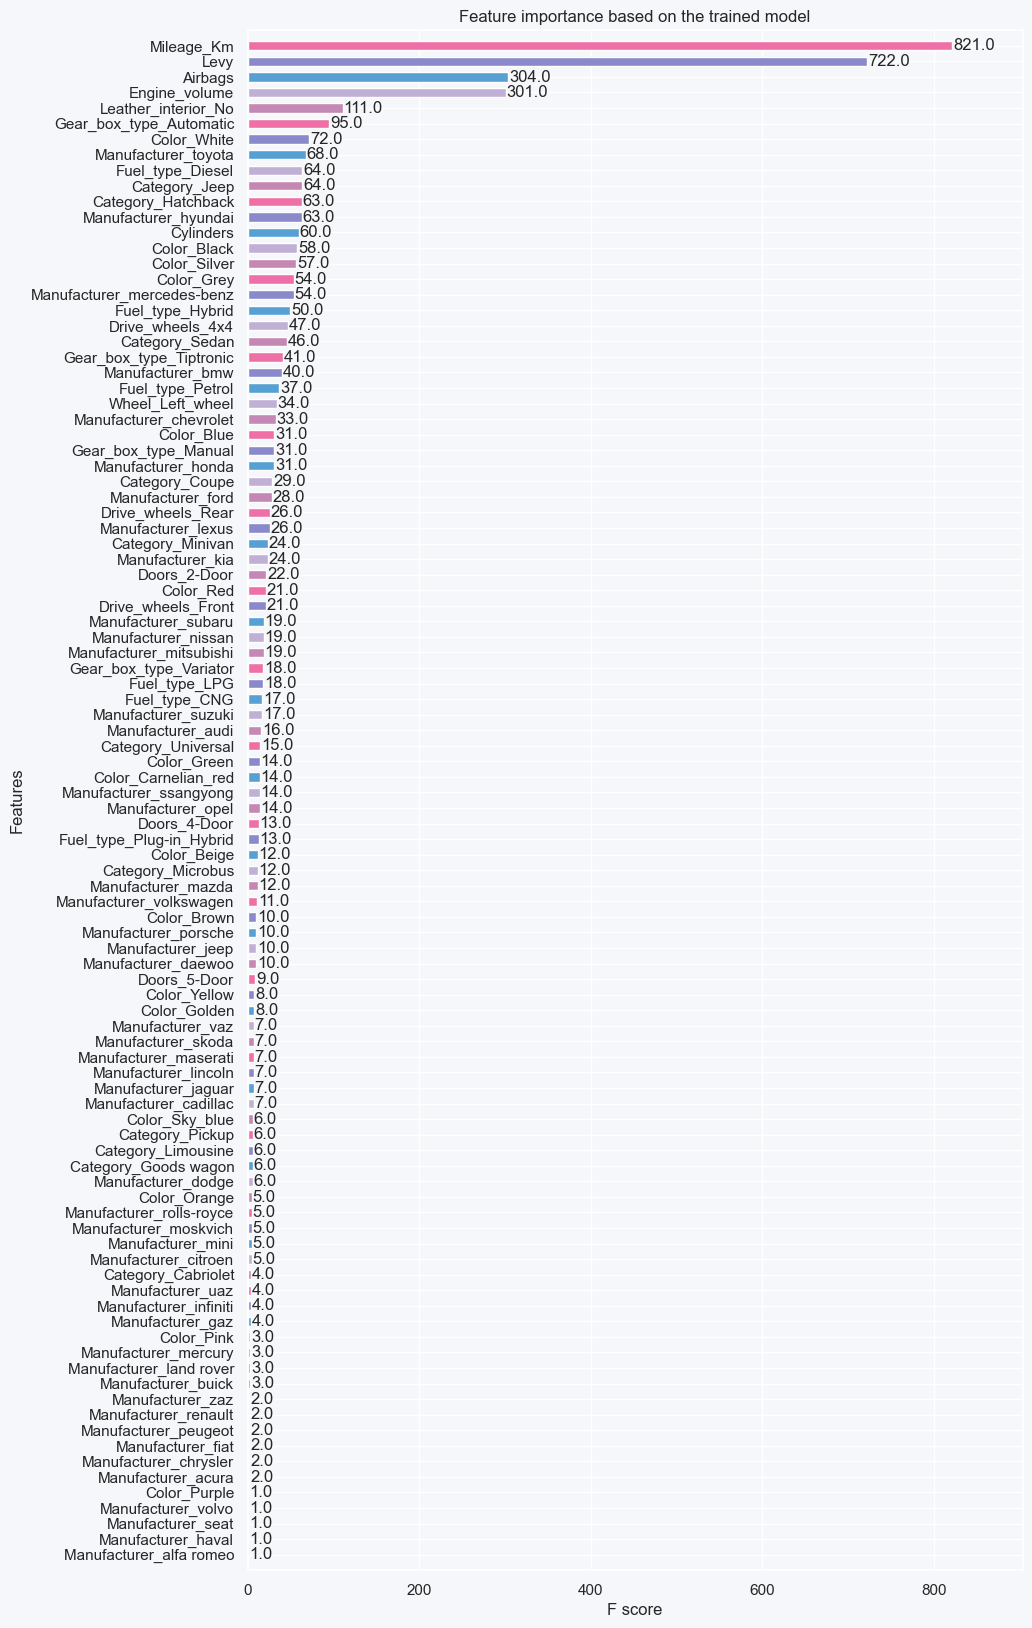

Feature Importances:
Mileage_Km: 821.0
Levy: 722.0
Airbags: 304.0
Engine_volume: 301.0
Leather_interior_No: 111.0
Gear_box_type_Automatic: 95.0
Color_White: 72.0
Manufacturer_toyota: 68.0
Category_Jeep: 64.0
Fuel_type_Diesel: 64.0
Manufacturer_hyundai: 63.0
Category_Hatchback: 63.0
Cylinders: 60.0
Color_Black: 58.0
Color_Silver: 57.0
Manufacturer_mercedes-benz: 54.0
Color_Grey: 54.0
Fuel_type_Hybrid: 50.0
Drive_wheels_4x4: 47.0
Category_Sedan: 46.0
Gear_box_type_Tiptronic: 41.0
Manufacturer_bmw: 40.0
Fuel_type_Petrol: 37.0
Wheel_Left_wheel: 34.0
Manufacturer_chevrolet: 33.0
Manufacturer_honda: 31.0
Gear_box_type_Manual: 31.0
Color_Blue: 31.0
Category_Coupe: 29.0
Manufacturer_ford: 28.0
Manufacturer_lexus: 26.0
Drive_wheels_Rear: 26.0
Manufacturer_kia: 24.0
Category_Minivan: 24.0
Doors_2-Door: 22.0
Drive_wheels_Front: 21.0
Color_Red: 21.0
Manufacturer_mitsubishi: 19.0
Manufacturer_nissan: 19.0
Manufacturer_subaru: 19.0
Fuel_type_LPG: 18.0
Gear_box_type_Variator: 18.0
Manufacturer_suzuki

In [17]:
from xgboost import XGBRegressor, plot_importance

model_XGB = XGBRegressor(base_score = 0.5,           # <--- `base_score` sets the initial prediction score (global bias) of all instances.
                         importance_type='total_gain',     # <--- Set importance metric. Options are: 'gain', 'total_gain', 'weight' or 'cover'.
                         colsample_bylevel = 1,      # <--- This parameter controls the fraction of features used when constructing each level of the trees. A value less than 1.0 means that a fraction of features will be randomly selected for each level.
                         colsample_bytree = 1,       # <--- This parameter controls the fraction of features used for training each decision tree. Setting this to a value less than 1 can help prevent overfitting by introducing additional randomness in the feature selection process.
                         gamma = 0,                  # <--- `gamma` is a regularization parameter that controls the minimum reduction in the loss function required to split a node. Increasing this parameter can lead to simpler trees and prevent overfitting.
                         max_delta_step = 0,         # <--- This parameter allows each leaf output to be adjusted in a different way, which can be useful for imbalanced classes. It's a parameter for setting the step size for updates in boosting.
                         random_state = 101,         # <--- Seed for random number generator. Setting a specific value ensures the reproducibility of the results.
                         min_child_weight = 1,       # <--- This parameter sets the minimum sum of weights needed in a child node for the node to be split. It helps control the complexity of the tree.
                         missing = None,             # <--- This is used to specify how missing values are handled during training. The default value is None, which means the algorithm will handle them internally.
                         n_jobs = 4,                 # <--- This sets the number of parallel threads to use during training. It can speed up the training process on multi-core machines.
                         scale_pos_weight = 1,       # <--- This is used for imbalanced datasets. It's the ratio of the number of negative class samples to the positive class samples.
                         seed = None,                # <--- This parameter sets the seed for the random number generator.
                         # silent = True,            # <--- If set to "True", it suppresses all informational messages during training. It's a good idea to keep it "True" for cleaner output.
                         subsample = 1)              # <--- `subsample` controls the fraction of samples used for training each decision tree. Setting this to a value less than 1 can help prevent overfitting.

# Fit the model on training data
model_XGB.fit(X_train, y_train)

# ============ FEATURE IMPORTANCE BASED ON XGBREGRESSOR USING FEATURE_IMPORTANCES_ FOR THE FEATURES SELECTED =====================

# Get importance scores
imp_scores_XGBReg = pd.Series(model_XGB.feature_importances_,
                              index = X_train.columns)

# Sort the features by importance scores
imp_scores_sorted = imp_scores_XGBReg.sort_values(ascending=False)

# Extract the top 20 features
top_features = imp_scores_sorted.nlargest(30)

# list with the top features selected
top_feats_XGB1 = top_features.index.tolist()

# Plot the importance of features in the trained model
fig = plt.figure(figsize=(10, 7))

top_features.plot(kind='barh',
                       color = '#c587b3')

plt.title('Top 20 original features importance of XGBRegressor from selected features ')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# ============ FEATURE IMPORTANCE BASED ON XGBREGRESSOR USING PLOT_IMPORTANCE =====================

plt.rcParams["figure.figsize"] = (10, 20)
plot_importance(model_XGB,
                height = 0.6,
                title = 'Feature importance based on the trained model',
                color = palette)

plt.show();

# Get feature names and importance scores
feature_names = X_train.columns
importance_scores = model_XGB.get_booster().get_fscore()        #  get_booster().get_fscore(): returns a dictionary where keys are the names of the features, and values are their corresponding importance scores

# Map feature names to importance scores
feature_importance = {feature_names[int(feature[1:])] if feature[1:].isdigit() else feature: importance_scores[feature] for feature in importance_scores}       # .isdigit(): used to check whether all the characters in a given string are digits (numeric characters). It returns 'True' if all characters are digit and 'False' otherwise

# Print the feature_importance dictionary
print("Feature Importances:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

# list with the top features selected
top_feats_XGB2 = list(feature_importance.keys())[-30:]

plt.show();

In [18]:
# # Apply Elbow Method: Plot the importance scores and look for an "elbow" point where adding more features doesn't significantly increase importance.
# plt.figure(figsize = (12,6))
#
# plt.plot(imp_scores_XGBReg.sort_values(ascending=False).values)
# plt.xlabel('Number of Features')
# plt.ylabel('Cumulative Importance')
# plt.show()

In [19]:
feats_selected = list(set(top_feats_ETR) & set(top_feats_XGB1) & set(top_feats_XGB2))
feats_selected

['Wheel_Left_wheel',
 'Airbags',
 'Color_White',
 'Levy',
 'Drive_wheels_4x4',
 'Color_Silver',
 'Mileage_Km',
 'Drive_wheels_Front',
 'Cylinders',
 'Gear_box_type_Tiptronic',
 'Engine_volume']

In [20]:
X_train = X_train[feats_selected]

X_test = X_test[feats_selected]

<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Multicollinearity Analysis

</div>

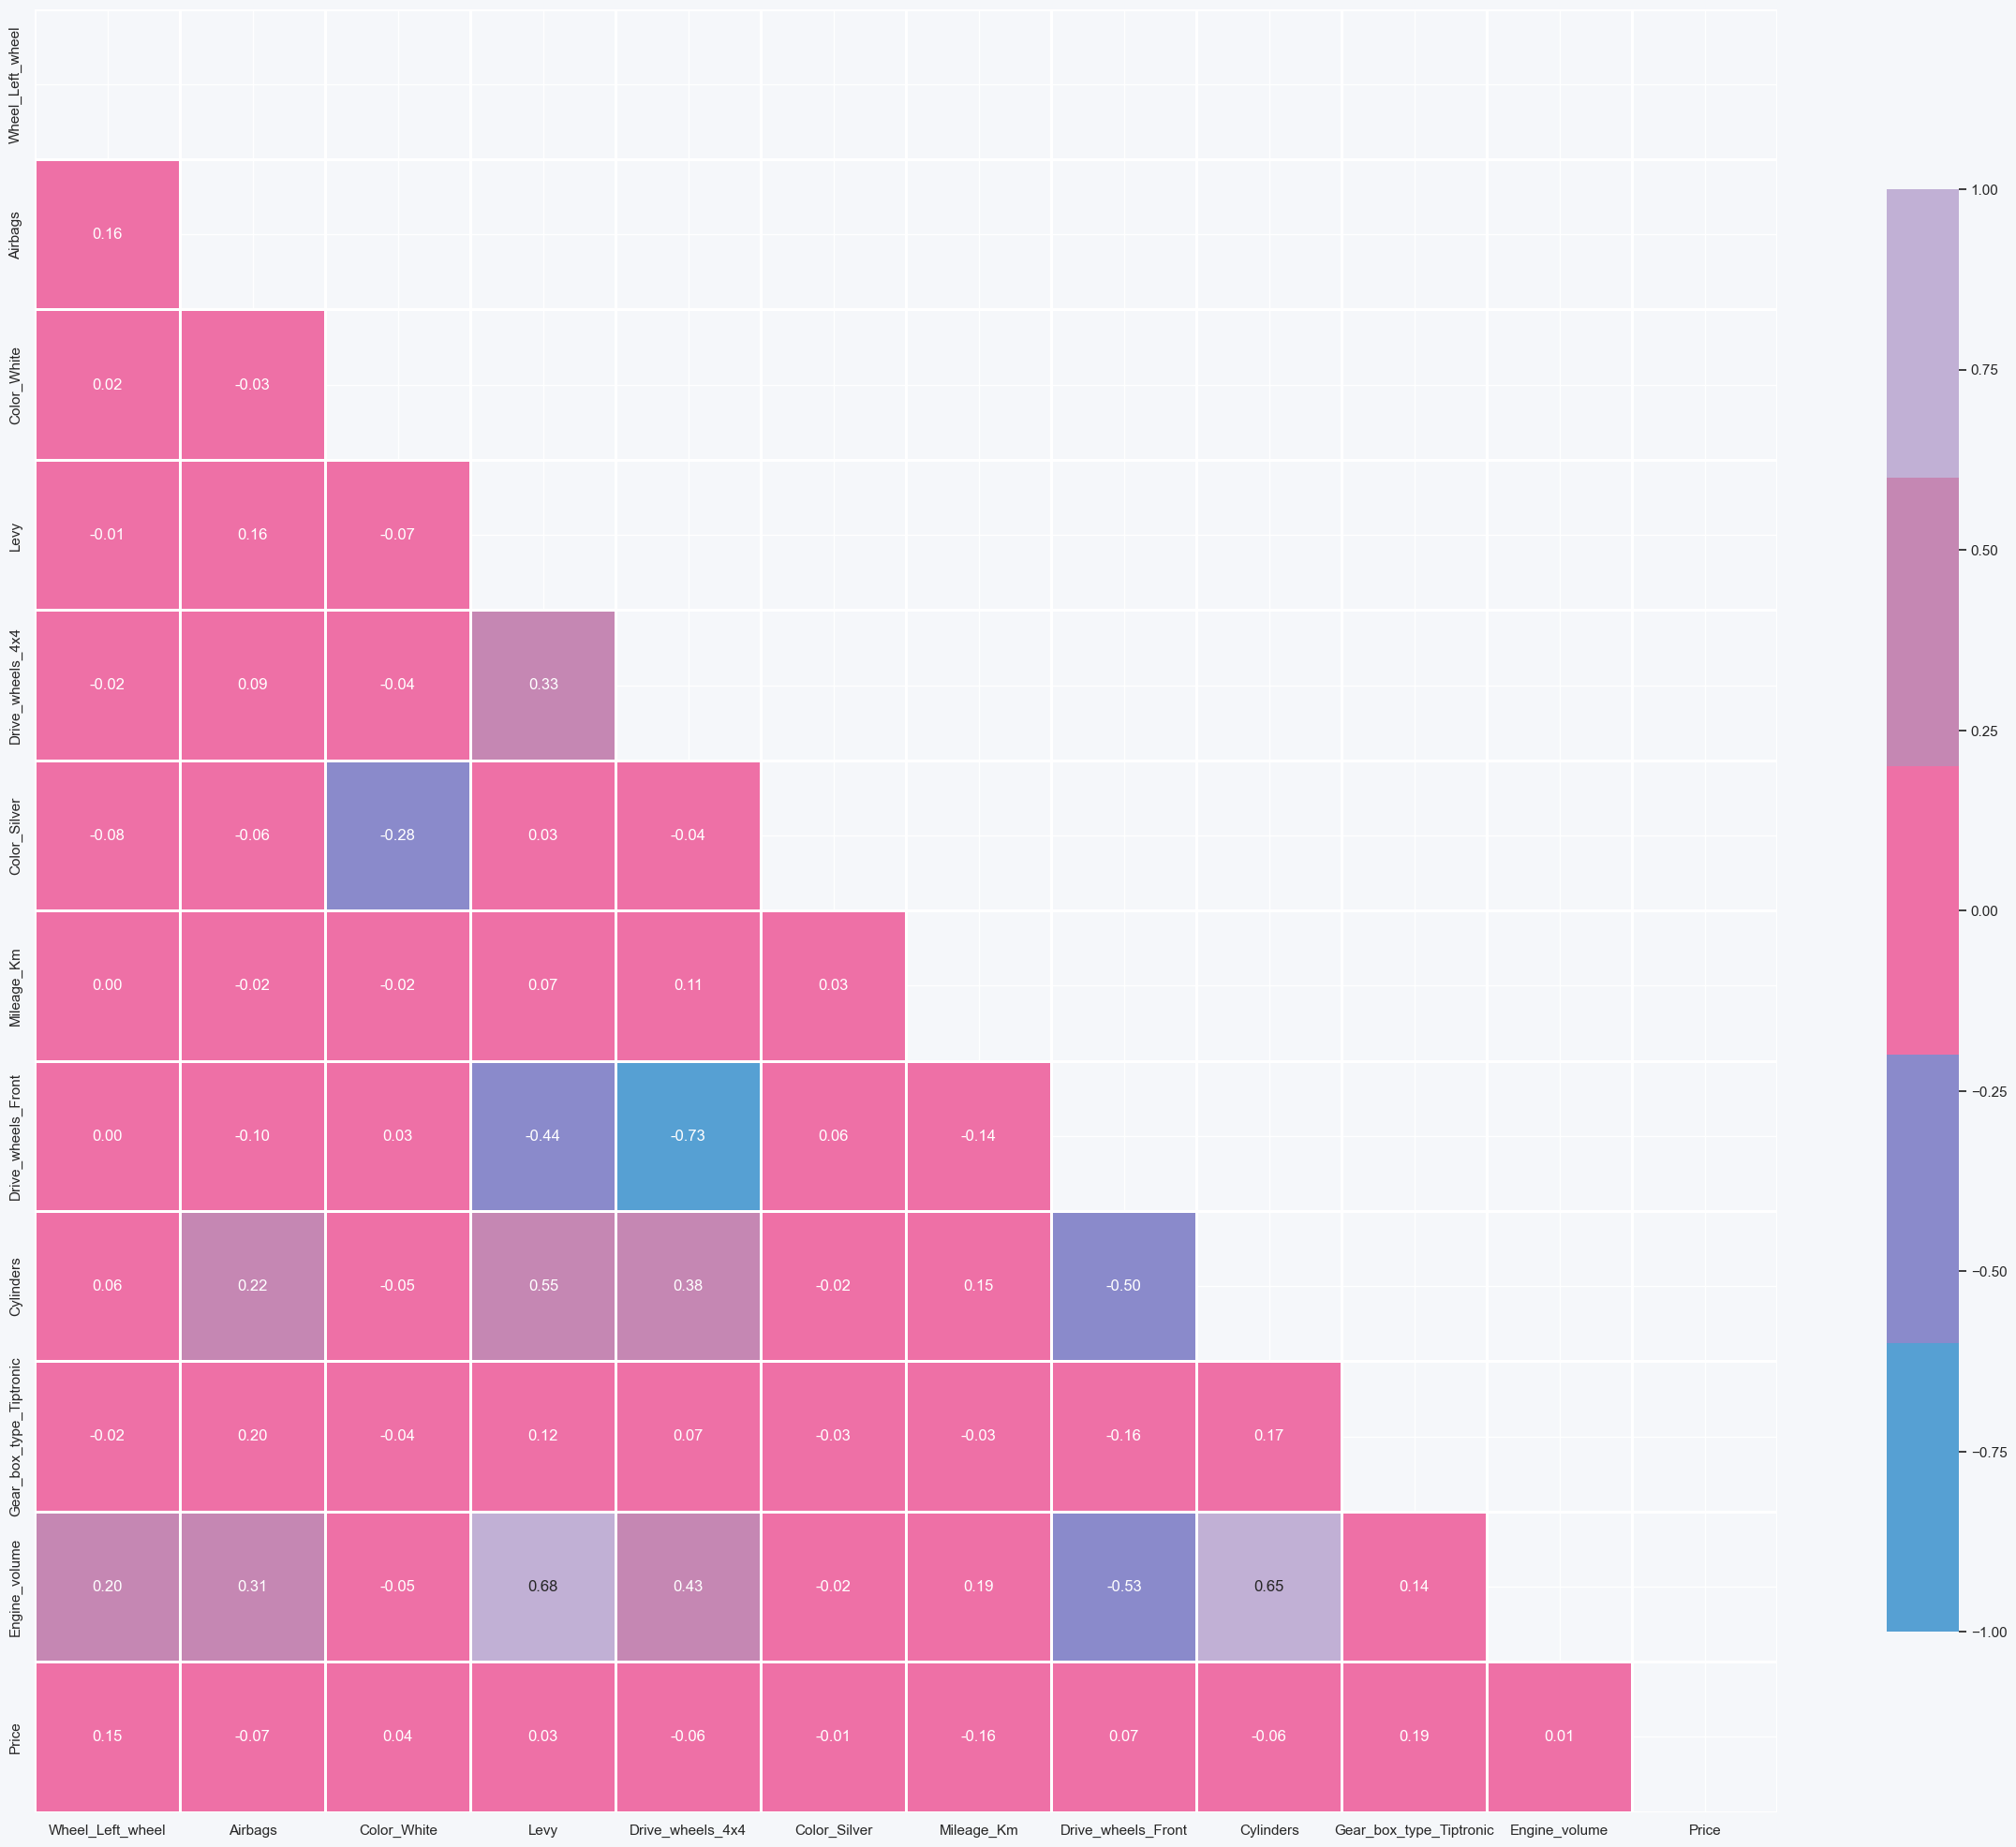

In [21]:
feats_list = feats_selected + ['Price']
#Correlation using heatmap
plt.figure(figsize = (30, 25))

# mask
mask = np.triu(np.ones_like(df_train_corr[feats_list].corr(), dtype=bool))

# Heatmap
sns.heatmap(df_train_corr[feats_list].corr(), mask=mask, annot=True, fmt=".2f",
               linewidths=1, cmap=cmap, vmin=-1, vmax=1,
               cbar_kws={"shrink": .8})

plt.show()

<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- <font color=red><b>No variables correlated to Price observed.</b></font>
</div>

<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Model + VIF (NOT WORKING)

</div>

The **Variance Inflation Factor (VIF) is a measure of collinearity among predictor variables within a multiple regression**. It is calculated by taking the ratio of the variance of all a given model's betas divide by the variance of a single beta if it were fit alone.

**Steps for implementing VIF**
1. Run a multiple regression.
2. Calculate the VIF factors.
3. Inspect the factors for each predictor variable, if the VIF is between 5-10, multicollinearity is likely present, and you should consider dropping the variable.

In [22]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the function that build the model and compute the VIF:

def build_model(X,y):
    X = sm.add_constant(X)         # --> Adding the constant
    lm = sm.OLS(y,X).fit()         # --> fitting the model
    print(lm.summary())            # --> model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)


In [23]:
X_train_new = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     167.9
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:05:38   Log-Likelihood:                 1046.7
No. Observations:               12801   AIC:                            -2069.
Df Residuals:                   12789   BIC:                            -1980.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [24]:
X_train_new = X_train.drop(["Drive_wheels_4x4"], axis = 1)

In [25]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:05:38   Log-Likelihood:                 1046.3
No. Observations:               12801   AIC:                            -2071.
Df Residuals:                   12790   BIC:                            -1989.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Selecting the features...

</div>

<div style="background-color: rgba(86, 160, 211, 0.2); padding: 10px;"> <center>8. BASELINE MODELS </center></div>

<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Ensemble Methods

</div>

In [26]:
df_summary = pd.DataFrame([],
                          index = ['RandomForestReg', 'XGBRegressor', 'GradientBoostReg', 'LGBMRegressor'],
                          columns = ['R^2', 'adj_R^2', 'mae', 'mse'])


In [27]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error, r2_score


# Creating a function to Train and test different Regression Models
def model_evaluation(X_train, Y_train, X_test, Y_test, model, model_name):

    best_r2 = 0

    model.fit(X_train, Y_train)

    Y_train_pred = model.predict(X_train)

    Y_test_pred = model.predict(X_test)

    #Metrics Calculation.
    mae = mean_absolute_error(Y_test,Y_test_pred)                                                                          # <--- Mean Absolute Error
    mse = mean_squared_error(Y_test,Y_test_pred)                                                                           # <--- Mean Squared Error
    rmse = np.sqrt(mse)                                                                                                    # <--- Root Mean Squared Error
    r2 = r2_score(Y_test,Y_test_pred)                                                                                      # <--- R-Squared (Coefficient of Determination)
    adjusted_r2 = 1 - ((1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))                         # <--- Adjusted R-Squared
    # msle = -mean_squared_log_error(Y_test, Y_test_pred)                                                                    # <--- Negative Mean Squared log Error

    # Access the parameter values
    params = model.get_params()

    print(f"R2 Score of {model_name} model => ",r2)
    print(f"Adjusted R2 Score of {model_name} model => ",adjusted_r2)
    print()
    print(f"MAE of {model_name} model => ",mae)
    print(f"MSE of {model_name} model => ",mse)
    print(f"RMSE of {model_name} model => ",rmse)
    # print(f"Neg_MSLE of {model_name} model => ",msle)
    print('-------------------------------------------------------------------------- \n')

    # Plots:
    plt.figure(figsize=(14,5))
    # Scatter plot.
    plt.subplot(1,2,1)
    plt.scatter(Y_train, Y_train_pred, color='#8a8acb', label='Train')
    plt.scatter(Y_test, Y_test_pred, color='#ee70a6', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot',fontweight="black",size=20,pad=10)

    # Residual plot.
    plt.subplot(1,2,2)
    plt.scatter(Y_train_pred, Y_train_pred - Y_train, color='#8a8acb', label='Train')
    plt.scatter(Y_test_pred, Y_test_pred - Y_test, color='#ee70a6', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title('Residual Plot',fontweight="black",size=20,pad=10)
    plt.show()

    return r2, adjusted_r2, mae, mse

### Random Forest Regressor

R2 Score of RandomForestReg model =>  0.6363122387744369
Adjusted R2 Score of RandomForestReg model =>  0.6350577497893377

MAE of RandomForestReg model =>  0.09538794201896783
MSE of RandomForestReg model =>  0.02145611477854362
RMSE of RandomForestReg model =>  0.14647905918097515
-------------------------------------------------------------------------- 



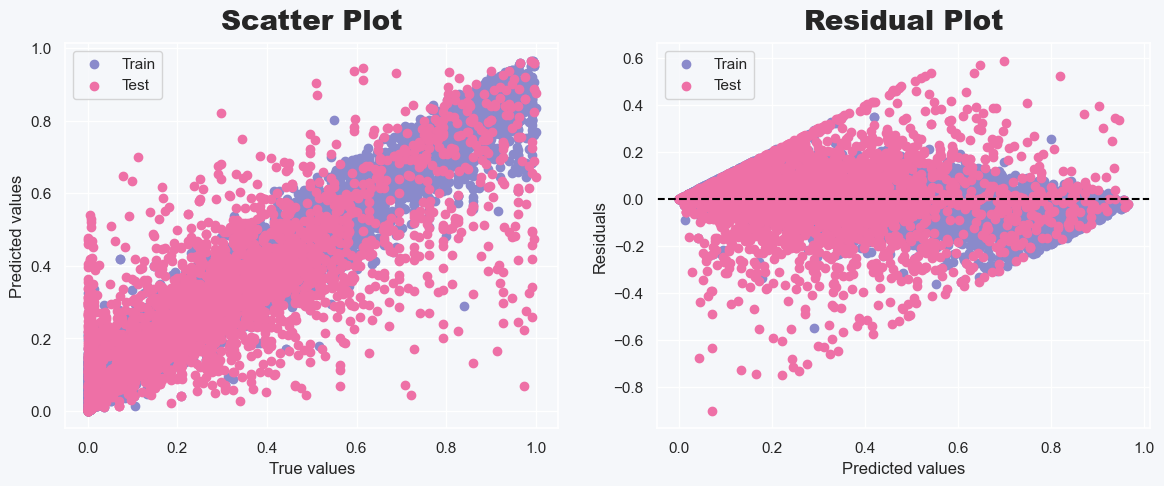

In [28]:
from sklearn.ensemble import RandomForestRegressor

r2, adjusted_r2, mae, mse = model_evaluation(X_train, y_train, X_test, y_test, RandomForestRegressor(random_state = 42), 'RandomForestReg')
df_summary.loc['RandomForestReg'] = [r2, adjusted_r2, mae, mse]

### XGBRegressor

R2 Score of XGBRegressor model =>  0.597346434779475
Adjusted R2 Score of XGBRegressor model =>  0.5959575388191659

MAE of XGBRegressor model =>  0.10912635610836369
MSE of XGBRegressor model =>  0.023754940452898943
RMSE of XGBRegressor model =>  0.15412637818653543
-------------------------------------------------------------------------- 



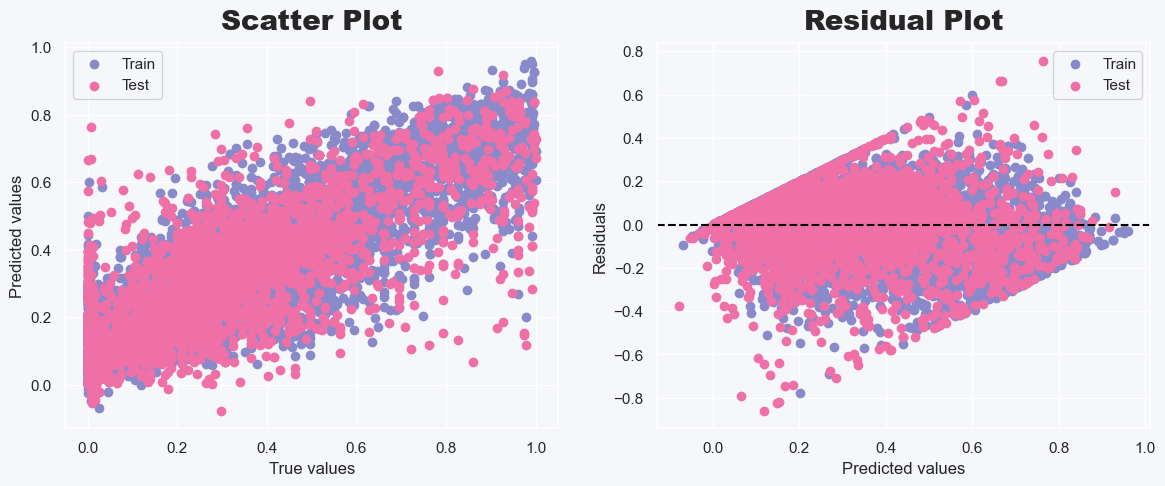

In [29]:
r2, adjusted_r2, mae, mse = model_evaluation(X_train, y_train, X_test, y_test, XGBRegressor(random_state = 42), 'XGBRegressor')
df_summary.loc['XGBRegressor'] = [r2, adjusted_r2, mae, mse]

### Gradient Boosting Regressor

R2 Score of GradientBoostReg model =>  0.42172666857825136
Adjusted R2 Score of GradientBoostReg model =>  0.41973199731903554

MAE of GradientBoostReg model =>  0.1400666533154194
MSE of GradientBoostReg model =>  0.034115800131807476
RMSE of GradientBoostReg model =>  0.1847046294271139
-------------------------------------------------------------------------- 



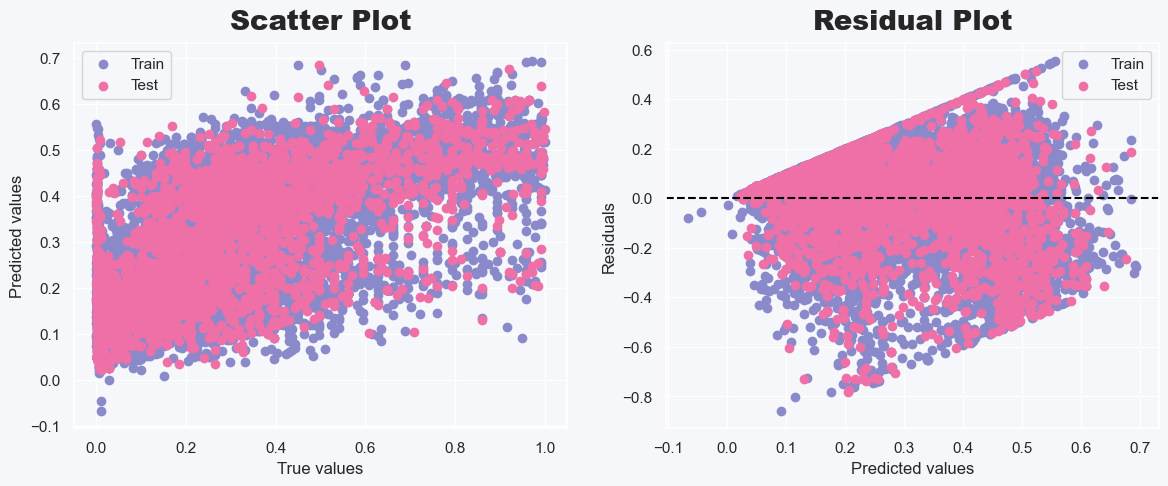

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

r2, adjusted_r2, mae, mse = model_evaluation(X_train, y_train, X_test, y_test, GradientBoostingRegressor(random_state = 42), 'GradientBoostReg')
df_summary.loc['GradientBoostReg'] = [r2, adjusted_r2, mae, mse]

### LGBMRegressor

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 12801, number of used features: 11
[LightGBM] [Info] Start training from score 0.302173
R2 Score of LGBMRegressor model =>  0.5854683361634976
Adjusted R2 Score of LGBMRegressor model =>  0.5840384683986178

MAE of LGBMRegressor model =>  0.11333250940211667
MSE of LGBMRegressor model =>  0.024455700485066227
RMSE of LGBMRegressor model =>  0.1563831847900094
-------------------------------------------------------------------------- 



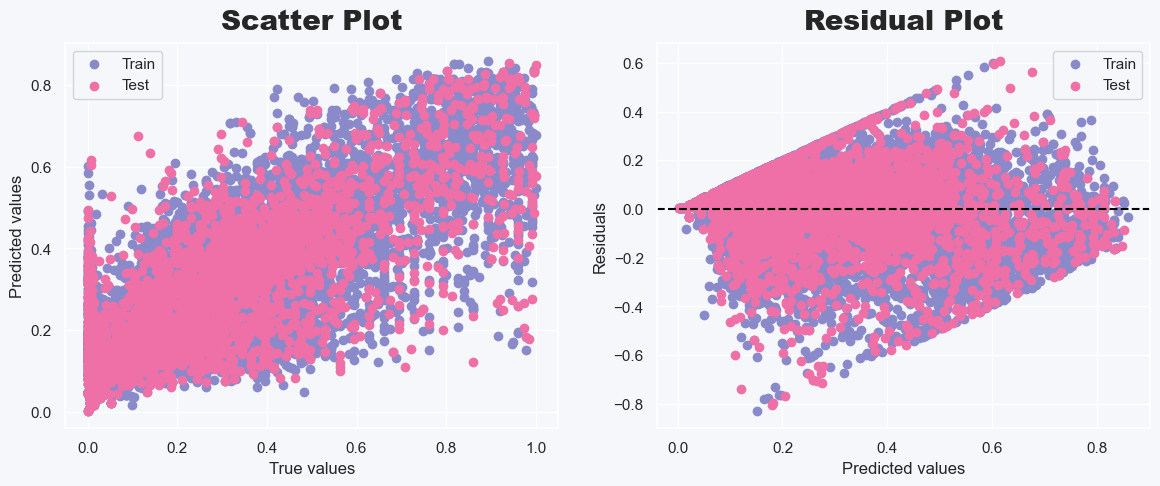

In [31]:
from lightgbm import LGBMRegressor

r2, adjusted_r2, mae, mse = model_evaluation(X_train, y_train, X_test, y_test, LGBMRegressor(random_state = 42), 'LGBMRegressor')
df_summary.loc['LGBMRegressor'] = [r2, adjusted_r2, mae, mse]

Summary for Ensemble Methods:

In [32]:
from IPython.display import display

df_summary

df_summary = df_summary.sort_values(by = 'mse', ascending = False)

display(df_summary.style.background_gradient(cmap="Blues"))

,R^2,adj_R^2,mae,mse
GradientBoostReg,0.421727,0.419732,0.140067,0.034116
LGBMRegressor,0.585468,0.584038,0.113333,0.024456
XGBRegressor,0.597346,0.595958,0.109126,0.023755
RandomForestReg,0.636312,0.635058,0.095388,0.021456


<div style="background-color: rgba(86, 160, 211, 0.2); padding: 10px;"> <center>9. HYPERPARAMETER TUNING </center></div>

<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Using GridSearch

</div>

In [53]:
from sklearn.model_selection import GridSearchCV


def hypertun_GridS(X_train, Y_train, X_test, Y_test, model, gs, model_name):

    grid_search = GridSearchCV(estimator = model,
                               param_grid = gs,
                               scoring = 'r2',
                               cv = 5,
                               n_jobs = -1)

    grid_search.fit(X_train, Y_train)

    # Best parameters found by Grid Search
    best_params = grid_search.best_params_

    print('Best parameters:', best_params)

    Y_pred_train = grid_search.predict(X_train)
    Y_pred_test = grid_search.predict(X_test)

    print('\n ---------------------------------------------------------------------')
    print("R2_Score of {}: {}".format(model_name, r2_score(Y_test,Y_pred_test)))
    print("Adjusted_R2_Score of {}: {}".format(model_name, 1-((1-r2_score(Y_test,Y_pred_test))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

    # print("Training RMSE for {}: {}".format(model_name, np.sqrt(mean_squared_error(Y_train, Y_pred_train))))
    # print ('Test RMSE for {}: {}'.format(model_name, np.sqrt(mean_squared_error(Y_test, Y_pred_test))))

### Random Forest Regressor

In [54]:
# Define the search space
param_grid_RF_GS = {'n_estimators': [30, 50, 100, 300],                                     # This is the number of trees in the forest
                    'max_features': ['auto', 'sqrt'],                                       # This is the number of features to consider when looking for the best split.
                    'max_depth': [int(x) for x in np.linspace(10, 120, num = 12)],          # The maximum depth of the tree - meaning the longest path between the root node and the leaf node.
                    'min_samples_split': [2, 6, 10],                                        # The minimum number of samples required to split an internal node:where the default = 2
                    'min_samples_leaf': [1, 3, 4],                                          # This is the minimum number of samples required to be at a leaf node where the default = 1
                    'bootstrap': [True, False]}                                             # If this is set as False, the whole dataset is used to build each tree, but it is set as Default.

In [55]:
hypertun_GridS(X_train, y_train, X_test, y_test,  RandomForestRegressor(random_state = 42), param_grid_RF_GS, 'RandomForestReg')


Best parameters: {'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

 ---------------------------------------------------------------------
R2_Score of RandomForestReg: 0.6387097748975892
Adjusted_R2_Score of RandomForestReg: 0.6374635558708954


### XGBRegressor

In [39]:
# Define the search space
param_grid_GS = { "colsample_bytree": [0.3, 0.5 , 0.8],            # Percentage of columns to be randomly samples for each tree.
               "reg_alpha": [0, 0.3, 0.4, 0.5, 1],                # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
               "reg_lambda": [0, 0.3, 0.4, 0.5, 1]                # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
             }

In [40]:
hypertun_GridS(X_train, y_train, X_test, y_test, XGBRegressor(random_state = 42), param_grid_GS, 'XGBRegressor')

Best parameters: {'colsample_bytree': 0.8, 'reg_alpha': 0.4, 'reg_lambda': 0.4}

 ---------------------------------------------------------------------
R2_Score of XGBRegressor: 0.6026929102564476
Adjusted_R2_Score of XGBRegressor: 0.6013224561996338


<div style = "background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Using Random Search

</div>

In [41]:
from sklearn.model_selection import RandomizedSearchCV

def hypertun_RandomS(X_train, Y_train, X_test, Y_test, model, gs, model_name):

    random_search = RandomizedSearchCV(estimator = model,
                                       param_distributions = gs,
                                       n_iter = 48,
                                       scoring = 'r2',
                                       cv = 5,
                                       n_jobs = -1,
                                       verbose = 0)

    # Fit the random search
    random_result = random_search.fit(X_train, Y_train)

    # Best parameters found by Grid Search
    best_params = random_result.best_params_

    print('Best parameters:', best_params)

    Y_pred_train = random_result.predict(X_train)
    Y_pred_test = random_result.predict(X_test)

    print('\n ---------------------------------------------------------------------')
    print("R2_Score of {}: {}".format(model_name, r2_score(Y_test,Y_pred_test)))
    print("Adjusted_R2_Score of {}: {}".format(model_name, 1-((1-r2_score(Y_test,Y_pred_test))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

### Random Forest Regressor

In [61]:
# Define the search space
param_grid_RF_RS = {'n_estimators': [30, 50, 100, 300, 400, 500],                                     # This is the number of trees in the forest
                    'max_features': ['auto', 'sqrt'],                                       # This is the number of features to consider when looking for the best split.
                    'max_depth': [int(x) for x in np.linspace(10, 120, num = 12)],          # The maximum depth of the tree - meaning the longest path between the root node and the leaf node.
                    'min_samples_split': [2, 4, 6, 10],                                        # The minimum number of samples required to split an internal node:where the default = 2
                    'min_samples_leaf': [1, 2, 3, 4],                                          # This is the minimum number of samples required to be at a leaf node where the default = 1
                    'bootstrap': [True, False]}                                             # If this is set as False, the whole dataset is used to build each tree, but it is set as Default.

In [63]:
hypertun_RandomS(X_train, y_train, X_test, y_test,  RandomForestRegressor(random_state = 42), param_grid_RF_RS, 'RandomForestReg')

Best parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True}

 ---------------------------------------------------------------------
R2_Score of RandomForestReg: 0.6392793845725966
Adjusted_R2_Score of RandomForestReg: 0.6380351303331167


<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

**Best Results**

<font color='#00a98f'> Best parameters</font>: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True}

<font color='#00a98f'> R2_Score of RandomForestReg</font>: 0.6392793845725966
<font color='#00a98f'> Adjusted_R2_Score of RandomForestReg</font>: 0.6380351303331167

</div>

### XGBRegressor

Since Random Search randomly picks a fixed number of hyperparameter combinations, I include three more hyperparameters and more values.

In [45]:
# Define the search space
param_grid_RS = { "max_depth": range(3,21,3),                              # Maximum depth of the tree, increasing it increases the model complexity.
                  "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,          # Learning rate shrinks the weights to make the boosting process more conservative
                  "gamma": [i/10.0 for i in range(0,5)],                   # Gamma specifies the minimum loss reduction required to make a split.
                  "colsample_bytree": [i/10.0 for i in range(3,10)],       # Percentage of columns to be randomly samples for each tree.
                  "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],              # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
                  "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]               # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
                }

In [52]:
hypertun_RandomS(X_train, y_train, X_test, y_test, XGBRegressor(random_state=42), param_grid_RS, 'XGBRegressor')

Best parameters: {'reg_lambda': 0.01, 'reg_alpha': 1, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.6}

 ---------------------------------------------------------------------
R2_Score of XGBRegressor: 0.6282244738072218
Adjusted_R2_Score of XGBRegressor: 0.6269420872320821


<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

**Best Results**

<font color='#00a98f'> Best parameters</font>: {'reg_lambda': 0.01, 'reg_alpha': 1e-05, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.6}

<font color='#00a98f'> R2_Score of XGBRegressor</font>: 0.6319090239288779
<font color='#00a98f'> Adjusted_R2_Score of XGBRegressor</font>: 0.6306393466831011

</div>

<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Residual Analysis of Model

</div>

<div style="background-color: rgba(86, 160, 211, 0.2); padding: 10px;"> <center>7. PREDICTION AND EVALUATION </center></div>